In [1]:
# if a virtual env is created, ignore this step
# %pip install -r requirements.txt

In [2]:
# this script used to generate requirements.txt 
# %pip freeze > requirements.txt

## Dataset preparation

For this assignment, we use a heart disease dataset, with patients' symtoms as attributes, and whether they have heart disease or not as labels.

- age
- sex
- chest pain type (4 values from 0 -> 3)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl: 1 -> diabete, 0 -> normal
- resting electrocardiographic results (values 0, 1, 2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [3]:
'''Run this code if you didn't have the dataset installed'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

d:\Bachelor\Curriculum\HK242\Data Mining\presentation\code\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


In [4]:
import pandas as pd
import os

In [5]:
df = pd.read_csv(os.path.join(path, 'heart.csv'))

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# inspect value each column 's metadata
for col in df.columns:
    print(df[col].value_counts())

age
58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
42    26
43    26
53    26
45    25
66    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
71    11
40    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
152     17
145     17
134     17
170     15
122     14
100     14
136     11
180     10
126     10
142      9
115      9
105      9
146      8
148      7
94       7
178      7
102      6
144      6
165      4
200      4
114      4
154      4
117      4
123      4
104      3
106      3
174      3
129      3
192   

In [9]:
# see if there's any null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# inspect the 'target' class
# postive: 526, negative: 499
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
# separate the columns into inputs and outputs
X = df.drop(['target'], axis=1) # specify axis=1 so that pd knows that target is a col name
y = df['target']

In [12]:
# split the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [13]:
# check for number of data points in training/test set
print(X_train.count()[0])

768


C:\Users\PC\AppData\Local\Temp\ipykernel_1956\2685371525.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train.count()[0])


## Feature Engineering

In [14]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
949,57,1,0,132,207,0,1,168,1,0.0,2,0,3
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
94,62,1,1,128,208,1,0,140,0,0.0,2,0,2
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2


We can see that the data doesn't need any further encoding (ordial categorial datatypes of attributes like cp or restecg has already been converted into integer)

## Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree with Entropy criterion

In [16]:
entropy_dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
entropy_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [17]:
y_pred_test_entropy = entropy_dtree.predict(X_test)

In [18]:
# predict y_pred_train to check for overfitting
y_pred_train_entropy = entropy_dtree.predict(X_train)

### Decision Tree with Gini criterion

In [19]:
gini_dtree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
gini_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
y_pred_test_gini = gini_dtree.predict(X_test)

In [21]:
# predict y_pred_train to check for overfitting
y_pred_train_gini = gini_dtree.predict(X_train)

### Accuracy Checking

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(f"GINI CRITERION -----------------------")
print(f"Training set accuracy: {accuracy_score(y_pred_test_gini, y_test)}")
print(f"Test set accuracy score: {accuracy_score(y_pred_train_gini, y_train)}")

GINI CRITERION -----------------------
Training set accuracy: 0.8171206225680934
Test set accuracy score: 0.8932291666666666


In [24]:
print(X_train.iloc[0])

age          57.0
sex           1.0
cp            0.0
trestbps    132.0
chol        207.0
fbs           0.0
restecg       1.0
thalach     168.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          3.0
Name: 949, dtype: float64


[Text(0.5446428571428571, 0.9, 'cp <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [367, 401]\nclass = 1'),
 Text(0.2857142857142857, 0.7, 'ca <= 0.5\ngini = 0.38\nsamples = 368\nvalue = [275, 93]\nclass = 0'),
 Text(0.4151785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'thal <= 2.5\ngini = 0.5\nsamples = 162\nvalue = [77, 85]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'thalach <= 119.5\ngini = 0.34\nsamples = 93\nvalue = [20, 73]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'gini = 0.28\nsamples = 88\nvalue = [15.0, 73.0]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'oldpeak <= 0.65\ngini = 0.29\nsamples = 69\nvalue = [57, 12]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = 0'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]\nclass = 0'),
 Text(0.42857142857142855, 0.5, 'trestbps <= 109.0\ngini = 0.07\nsamples = 206\nvalue

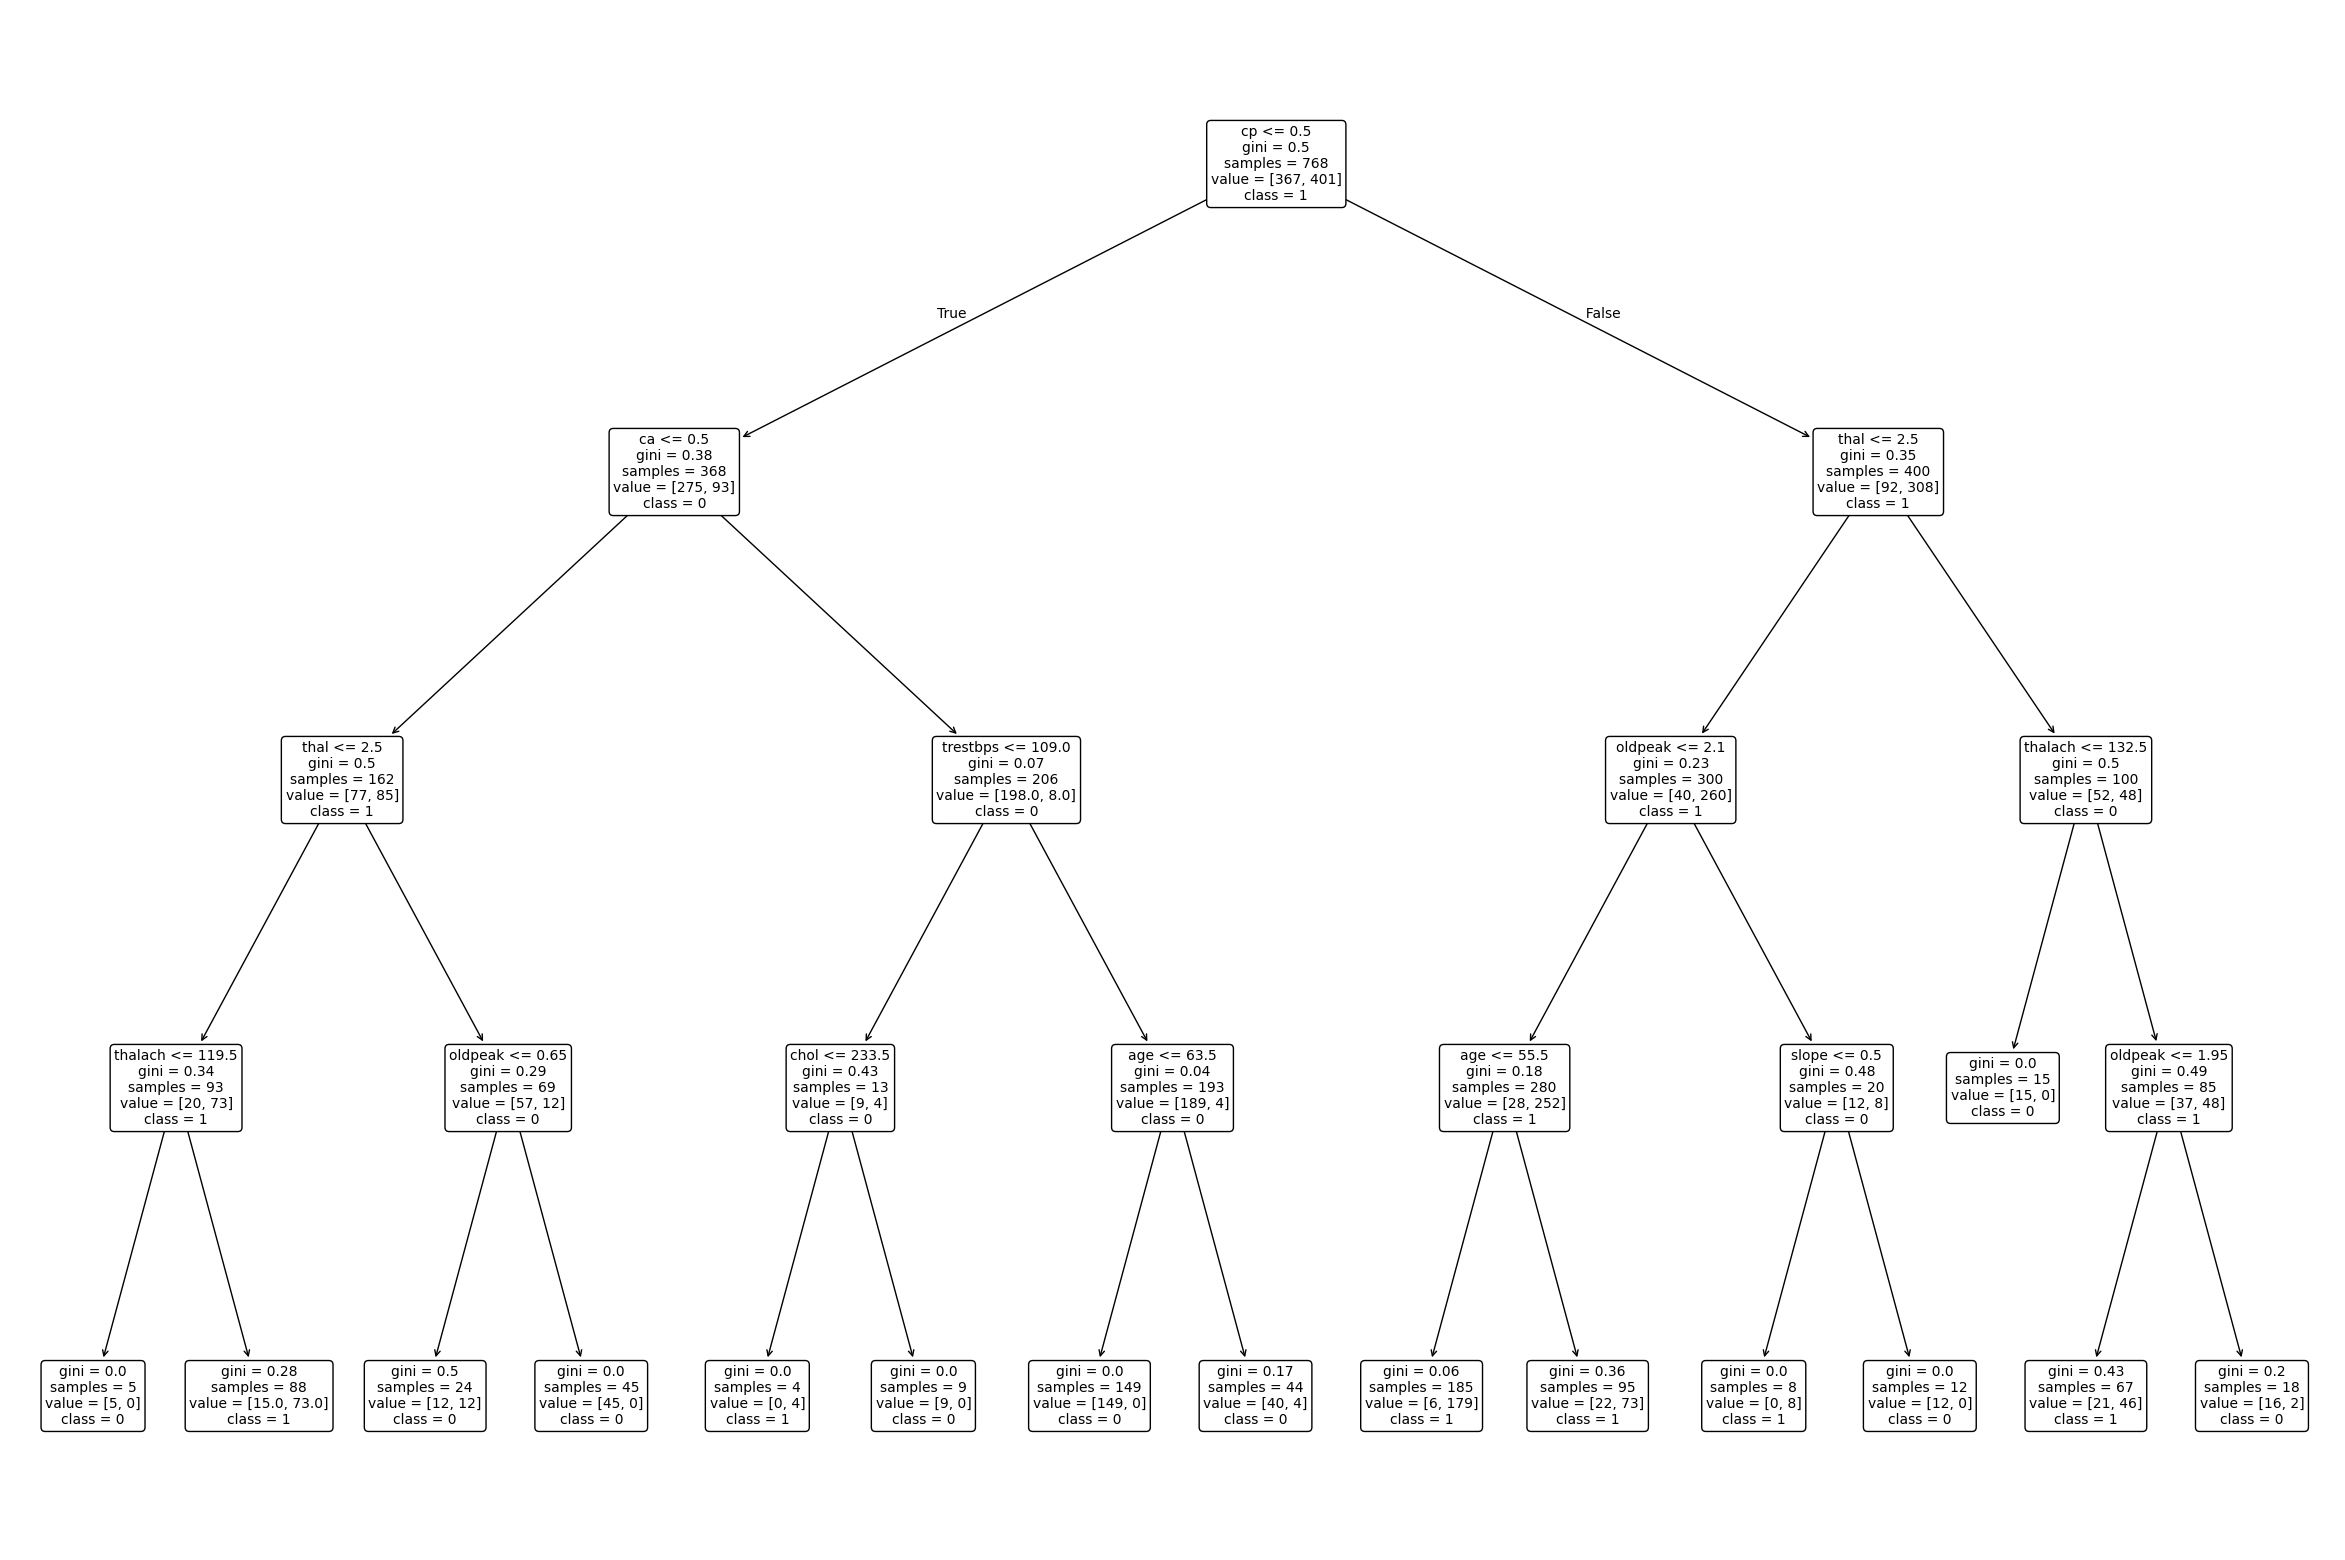

In [25]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 20))
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
plot_tree(decision_tree=gini_dtree, fontsize=10, feature_names=feature_names, class_names=['0', '1'], precision=2, rounded=True)

In [26]:
print("ENTROPY CRITERION ----------------------")
print(f"Training set accuracy: {accuracy_score(y_pred_test_entropy, y_test)}")
print(f"Test set accuracy score: {accuracy_score(y_pred_train_entropy, y_train)}")

ENTROPY CRITERION ----------------------
Training set accuracy: 0.8015564202334631
Test set accuracy score: 0.8658854166666666


[Text(0.5375, 0.9, 'cp <= 0.5\nentropy = 1.0\nsamples = 768\nvalue = [367, 401]\nclass = 1'),
 Text(0.325, 0.7, 'ca <= 0.5\nentropy = 0.82\nsamples = 368\nvalue = [275, 93]\nclass = 0'),
 Text(0.43125, 0.8, 'True  '),
 Text(0.2, 0.5, 'thal <= 2.5\nentropy = 1.0\nsamples = 162\nvalue = [77, 85]\nclass = 1'),
 Text(0.1, 0.3, 'exang <= 0.5\nentropy = 0.75\nsamples = 93\nvalue = [20, 73]\nclass = 1'),
 Text(0.05, 0.1, 'entropy = 0.41\nsamples = 61\nvalue = [5, 56]\nclass = 1'),
 Text(0.15, 0.1, 'entropy = 1.0\nsamples = 32\nvalue = [15, 17]\nclass = 1'),
 Text(0.3, 0.3, 'oldpeak <= 0.65\nentropy = 0.67\nsamples = 69\nvalue = [57, 12]\nclass = 0'),
 Text(0.25, 0.1, 'entropy = 1.0\nsamples = 24\nvalue = [12, 12]\nclass = 0'),
 Text(0.35, 0.1, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0]\nclass = 0'),
 Text(0.45, 0.5, 'restecg <= 0.5\nentropy = 0.24\nsamples = 206\nvalue = [198.0, 8.0]\nclass = 0'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 127\nvalue = [127, 0]\nclass = 0'),
 Text(0.5, 0.3,

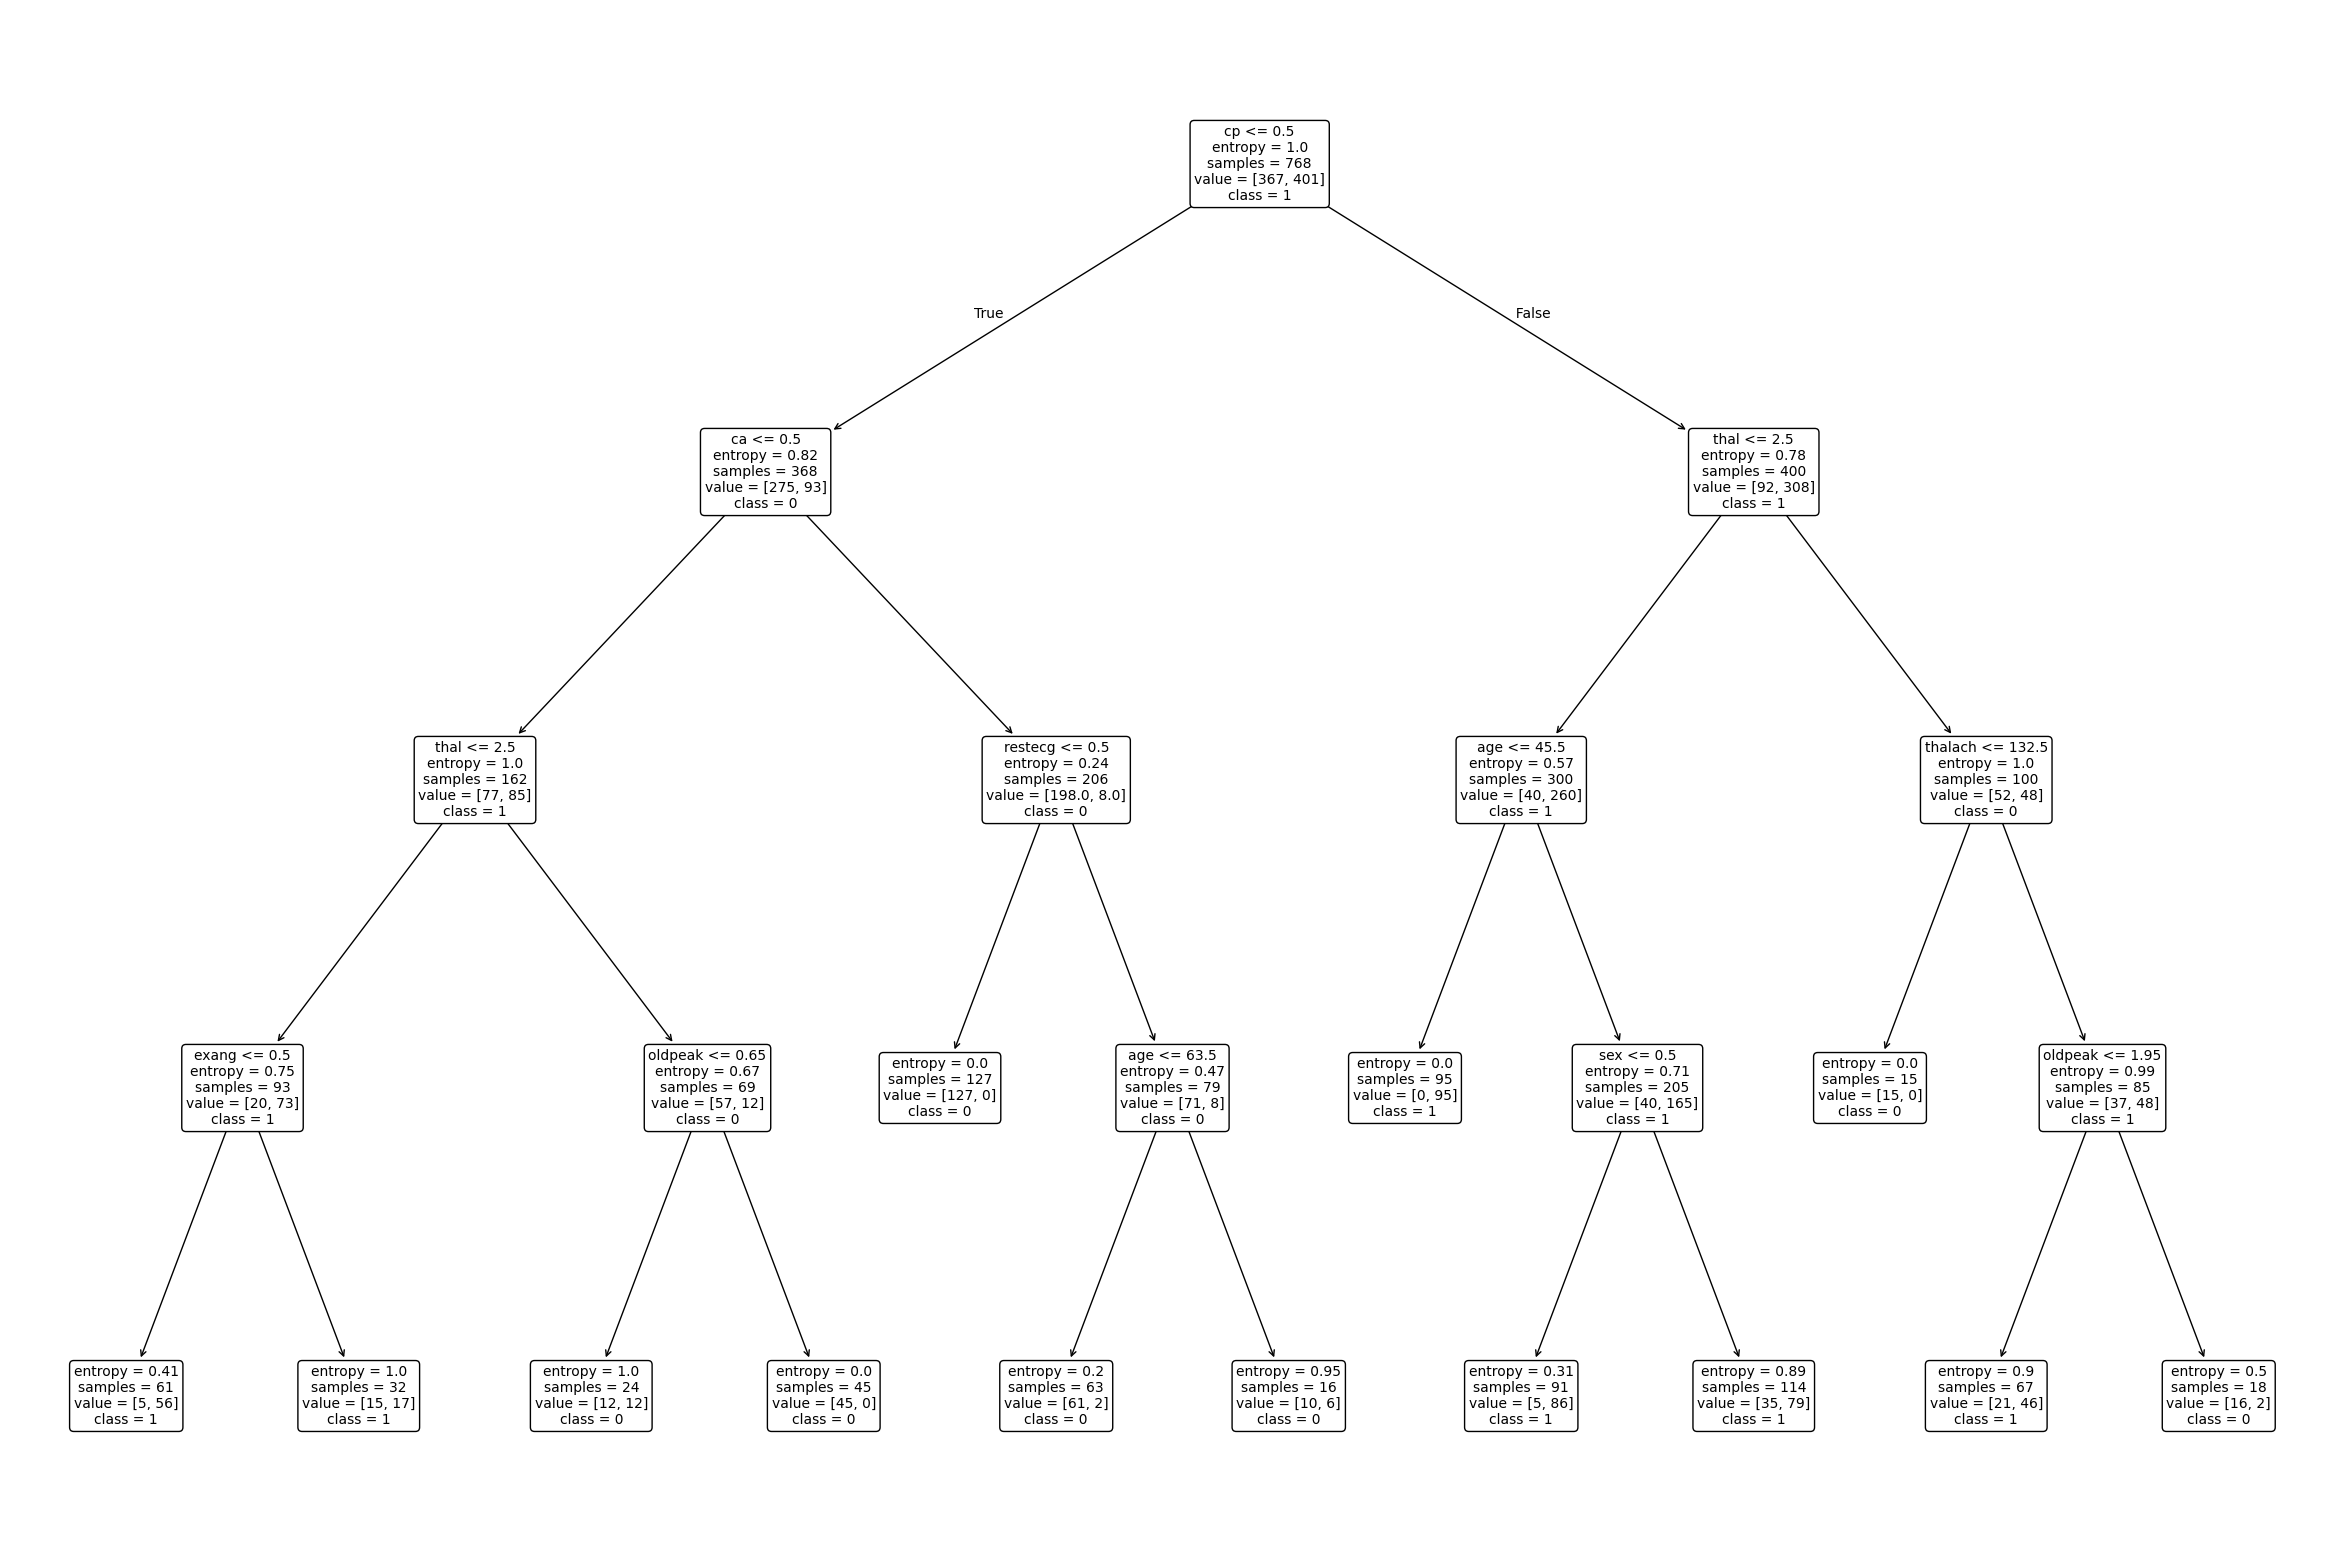

In [27]:
plt.figure(figsize=(30, 20))
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
plot_tree(decision_tree=entropy_dtree, fontsize=10, feature_names=feature_names, class_names=['0', '1'], precision=2, rounded=True)

## Model Evaluation

### Confusion Matrix, Accuracy, Sensitivity, Specificity, Preicision, Recall, F1-score, F_beta-score

In [30]:
'''Confusion Matrix'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def draw_cm(y_test, y_pred, criterion):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {criterion} criterion')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

CONFUSION MATRIX FOR GINI CRITERION----------------------


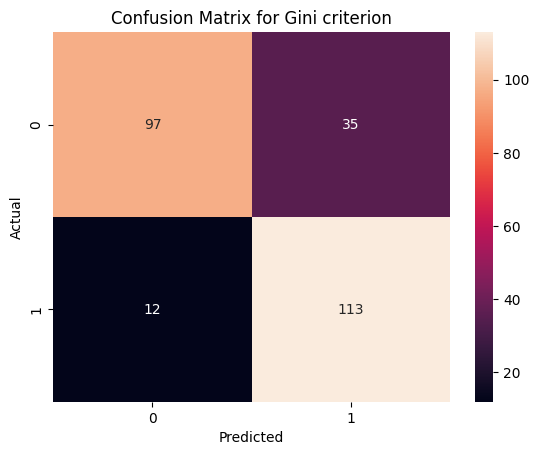

CONFUSION MATRIX FOR ENTROPY CRITERION----------------------


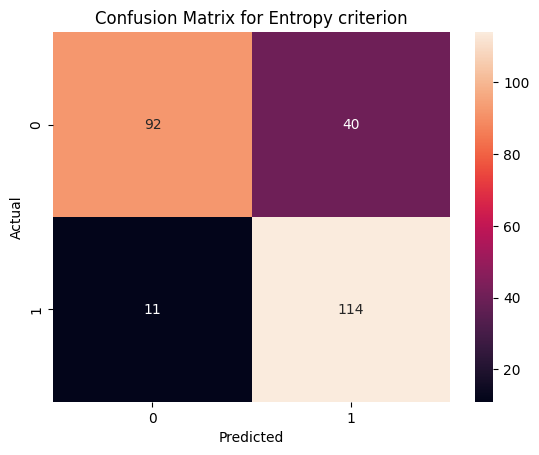

In [31]:
print("CONFUSION MATRIX FOR GINI CRITERION----------------------")
draw_cm(y_test, y_pred_test_gini, "Gini")

print("CONFUSION MATRIX FOR ENTROPY CRITERION----------------------")
draw_cm(y_test, y_pred_test_entropy, "Entropy")

In [41]:
'''Accuracy, Sensitivity, Specificity'''
from sklearn.metrics import accuracy_score, confusion_matrix

def calc_sensitivity(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tp / (tp + fn)

def calc_specificity(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

print("GINI CRITERION -----------------------")
gini_acc = "{:.4f}".format(accuracy_score(y_test, y_pred_test_gini))
gini_sens = "{:.4f}".format(calc_sensitivity(y_test, y_pred_test_gini))
gini_spec = "{:.4f}".format(calc_specificity(y_test, y_pred_test_gini))
print(f"Accuracy: {gini_acc}")
print(f"Sensitivity: {gini_sens}")
print(f"Specificity: {gini_spec}")

print("ENTROPY CRITERION -----------------------")
entropy_acc = "{:.4f}".format(accuracy_score(y_test, y_pred_test_entropy))
entropy_sens = "{:.4f}".format(calc_sensitivity(y_test, y_pred_test_entropy))
entropy_spec = "{:.4f}".format(calc_specificity(y_test, y_pred_test_entropy))
print(f"Accuracy: {entropy_acc}")
print(f"Sensitivity: {entropy_sens}")
print(f"Specificity: {entropy_spec}")

GINI CRITERION -----------------------
Accuracy: 0.8171
Sensitivity: 0.9040
Specificity: 0.7348
ENTROPY CRITERION -----------------------
Accuracy: 0.8016
Sensitivity: 0.9120
Specificity: 0.6970


In [42]:
'''Precision, Recall, F1-Score, F_beta-Score'''
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

print("GINI CRITERION -----------------------")
gini_prec = format(precision_score(y_test, y_pred_test_gini), '.4f')
gini_rec = format(recall_score(y_test, y_pred_test_gini), '.4f')
gini_f1 = format(f1_score(y_test, y_pred_test_gini), '.4f')
gini_f2 = format(fbeta_score(y_test, y_pred_test_gini, beta=2), '.4f')
print(f"Precision: {gini_prec}")
print(f"Recall: {gini_rec}")
print(f"F1-Score: {gini_f1}")
print(f"F2-Score: {gini_f2}")

print("ENTROPY CRITERION -----------------------")
entropy_prec = format(precision_score(y_test, y_pred_test_entropy), '.4f')
entropy_rec = format(recall_score(y_test, y_pred_test_entropy), '.4f')
entropy_f1 = format(f1_score(y_test, y_pred_test_entropy), '.4f')
entropy_f2 = format(fbeta_score(y_test, y_pred_test_entropy, beta=2), '.4f')

print(f"Precision: {entropy_prec}")
print(f"Recall: {entropy_rec}")
print(f"F1-Score: {entropy_f1}")
print(f"F2-Score: {entropy_f2}")

GINI CRITERION -----------------------
Precision: 0.7635
Recall: 0.9040
F1-Score: 0.8278
F2-Score: 0.8719
ENTROPY CRITERION -----------------------
Precision: 0.7403
Recall: 0.9120
F1-Score: 0.8172
F2-Score: 0.8716


In [43]:
'''Draw an Overview Table'''
from tabulate import tabulate

overview_table = [
    ['Gini', gini_acc, gini_sens, gini_spec, gini_prec, gini_rec, gini_f1, gini_f2],
    ['Entropy', entropy_acc, entropy_sens, entropy_spec, entropy_prec, entropy_rec, entropy_f1, entropy_f2]
]

headers = ['Criterion', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1-Score', 'F2-Score']

tabulated_overview = tabulate(overview_table, headers, tablefmt='pretty')
print(tabulated_overview)

+-----------+----------+-------------+-------------+-----------+--------+----------+----------+
| Criterion | Accuracy | Sensitivity | Specificity | Precision | Recall | F1-Score | F2-Score |
+-----------+----------+-------------+-------------+-----------+--------+----------+----------+
|   Gini    |  0.8171  |   0.9040    |   0.7348    |  0.7635   | 0.9040 |  0.8278  |  0.8719  |
|  Entropy  |  0.8016  |   0.9120    |   0.6970    |  0.7403   | 0.9120 |  0.8172  |  0.8716  |
+-----------+----------+-------------+-------------+-----------+--------+----------+----------+


### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores_gini = cross_val_score(gini_dtree, X, y, cv=10)
cross_val_scores_gini_mean = format(cross_val_scores_gini.mean(), '.4f')
cross_val_scores_gini_std = format(cross_val_scores_gini.std(), '.4f')

cross_val_scores_entropy = cross_val_score(entropy_dtree, X, y, cv=10)
cross_val_scores_entropy_mean = format(cross_val_scores_entropy.mean(), '.4f')
cross_val_scores_entropy_std = format(cross_val_scores_entropy.std(), '.4f')

cross_val_score_table = [
    ['Gini', cross_val_scores_gini_mean, cross_val_scores_gini_std],
    ['Entropy', cross_val_scores_entropy_mean, cross_val_scores_entropy_std]
]

headers = ['Criterion', 'Accuracy', 'Std Dev']

cross_val_score_table = tabulate(cross_val_score_table, headers, tablefmt='pretty')
print(cross_val_score_table)

+-----------+----------+---------+
| Criterion | Accuracy | Std Dev |
+-----------+----------+---------+
|   Gini    |  0.8429  | 0.0397  |
|  Entropy  |  0.8352  | 0.0415  |
+-----------+----------+---------+


### Stratified Cross-validation

In [ ]:

from sklearn.model_selection import StratifiedKFold

def stratifiedKFoldEvaluate(criterion, tree, n_splits=10, shuffle=True, random_state=42):
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    acc_arr = []
    print(f"CRITERIA: {criterion}".upper())
    print("----------------------------------------------")
    print("RUNNING TRAINING AND TESTING FOR EACH FOLD")
    for idx, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_, X_test_ = X.iloc[train_index], X.iloc[test_index]
        y_train_, y_test_ = y.iloc[train_index], y.iloc[test_index]

        gini_dtree.fit(X_train_, y_train_)
        y_pred_test_gini_ = tree.predict(X_test_)

        acc = accuracy_score(y_test_, y_pred_test_gini_)
        print(f"Accuracy of repetition {idx}: {accuracy_score(y_test_, y_pred_test_gini_):.4f}")
        acc_arr.append(acc)
        
    print("----------------------------------------------")
    print("RESULTS")
    print(f"Mean accuracy: {format(pd.Series(acc_arr).mean(), '.4f')}")
    print(f"Standard deviation: {format(pd.Series(acc_arr).std(), '.4f')}")
    print("----------------------------------------------")


In [ ]:
stratifiedKFoldEvaluate("gini", gini_dtree)
stratifiedKFoldEvaluate("entropy", entropy_dtree)

CRITERIA: GINI
----------------------------------------------
RUNNING TRAINING AND TESTING FOR EACH FOLD
Accuracy of repetition 0: 0.9320
Accuracy of repetition 1: 0.8544
Accuracy of repetition 2: 0.8932
Accuracy of repetition 3: 0.8641
Accuracy of repetition 4: 0.8447
Accuracy of repetition 5: 0.8137
Accuracy of repetition 6: 0.8333
Accuracy of repetition 7: 0.8137
Accuracy of repetition 8: 0.8922
Accuracy of repetition 9: 0.8235
----------------------------------------------
RESULTS
Mean accuracy: 0.8565
Standard deviation: 0.0392
----------------------------------------------
CRITERIA: ENTROPY
----------------------------------------------
RUNNING TRAINING AND TESTING FOR EACH FOLD
Accuracy of repetition 0: 0.8641
Accuracy of repetition 1: 0.8641
Accuracy of repetition 2: 0.8835
Accuracy of repetition 3: 0.8738
Accuracy of repetition 4: 0.8835
Accuracy of repetition 5: 0.7647
Accuracy of repetition 6: 0.8137
Accuracy of repetition 7: 0.8333
Accuracy of repetition 8: 0.8725
Accuracy 

## Ensemble method: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_gini = RandomForestClassifier(n_estimators=10, random_state=42, criterion='gini')
rf_gini.fit(X_train, y_train)
y_pred_gini = rf_gini.predict_proba(X_test)
y_pred_prob_gini = y_pred_gini[:, 1]


rf_entropy = RandomForestClassifier(n_estimators=10, random_state=42, criterion='entropy')
rf_entropy.fit(X_train, y_train)
y_pred_prob_entropy = rf_entropy.predict_proba(X_test)
y_pred_prob_entropy = y_pred_prob_entropy[:, 1]

### ROC curves

We cannot draw a ROC curve for a Decision Tree because the return is only label (deterministic) and not score (probability). But we can draw a ROC curve for a Random Forest.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred_probs, criterions):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves')
    
    for idx, criterion in enumerate(criterions):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[idx])
        # calulate ROC auc score
        auc_score = roc_auc_score(y_test, y_pred_probs[idx])
        plt.plot(fpr, tpr, label=f'{criterion} criterion (auc score: {auc_score:.4f})')
    plt.plot((0,1), (0, 1), 'k--', label='Random Classifier')
    plt.legend()
    plt.show()

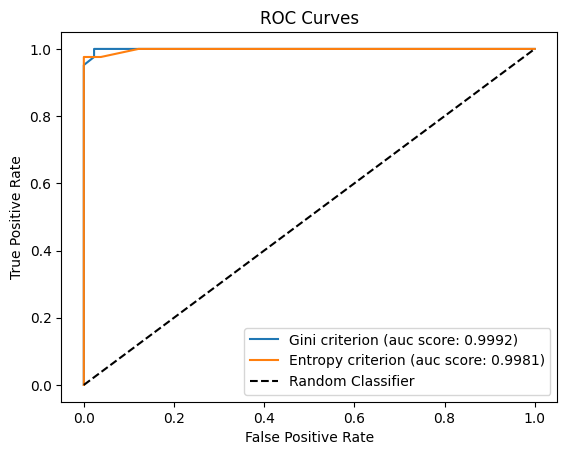

In [ ]:
plot_roc_curve(y_test, [y_pred_prob_gini, y_pred_prob_entropy], ["Gini", "Entropy"])